In [1]:
from scipy.special import roots_jacobi, eval_jacobi
import numpy as np
import scipy
import math

In [2]:
import matplotlib.pyplot as plt

### Compute Coordinates:

In [123]:
coord_x = np.array([0, 1, 2, 6, 8, 10, 11, 12])
coord_y = np.array([0, 2, 6, 8])

In [127]:
npts = 4

L_x = 12 # Denotes total length in [0, L]
M_x = len(coord_x) - 1 # Denotes number of elements
L_y = 8
M_y = len(coord_y) - 1

In [18]:
def corners_2d(x_array, y_array):
    return(np.meshgrid(x_array, y_array))

In [102]:
def array_2d(M_x, M_y, npts):
    return(np.zeros((M_y, M_x, npts, npts)))

In [49]:
# Note range_in denotes endpoints of x, y coordinate arrays:

def int_points(range_in, npts, M_value):

    p_order = npts - 1
    xinterior, w = roots_jacobi(p_order - 1,1,1) # returns interior GLL nodes from range -1 and 1
    GLL_points = np.pad(xinterior, (1, 1), 'constant', constant_values=(-1, 1))
    GLL_dist = np.array([np.abs(GLL_points[0] - value) for value in GLL_points])
    
    return_array = np.zeros([M_value, npts])
    
    for i in np.arange(M_value):
        array = np.array([range_in[i]])
        dist = range_in[i + 1] - range_in[i]
        
        for j in GLL_dist[1:]: 
            scaled_point = ((j / 2) * (dist)) + range_in[i] # Note: 2 here is the distance from -1 to 1
            array = np.concatenate((array, np.array([scaled_point])))
            
        return_array[i, :] = array
    
    return(return_array)

In [103]:
# Returns 2 (M_y, M_x, npts, npts) arrays - the 0 index contains the x value; the 1 index contains the y value:

def coords_2d(coord_x, coord_y, npts, M_x, M_y):
    
    p_order = npts - 1
    xinterior, w = roots_jacobi(p_order - 1,1,1) # returns interior GLL nodes from range -1 and 1
    GLL_points = np.pad(xinterior, (1, 1), 'constant', constant_values=(-1, 1))
    GLL_dist = np.array([np.abs(GLL_points[0] - value) for value in GLL_points])
    
    Lx_array = int_points(coord_x, npts, M_x)
    Ly_array = int_points(coord_y, npts, M_y)
    return_array_x = array_2d(M_x, M_y, npts)
    return_array_y = array_2d(M_x, M_y, npts)
    
    x_i = 0
    for elem_1 in Lx_array:
        y_i = 0
        for elem_2 in Ly_array:
            return_array_x[y_i, x_i, :, :] = np.meshgrid(elem_1, elem_2)[0]
            return_array_y[y_i, x_i, :, :] = np.meshgrid(elem_1, elem_2)[1]
            
            y_i += 1
        x_i += 1
    
    return(return_array_x, return_array_y)

### Initialize Gaussian Field:

In [126]:
# Returns 2D normalized Gaussian scalar field; sigma denotes the spread in the x, y directions: 

def norm_Gaussian_2d(coords_2d, array_2d, sigma, L_x, L_y, M_x, M_y):
    
    numerator_x = np.exp(-(coords_2d[0] - (L_x / 2))**2 / (2 * sigma[0]**2))
    numerator_y = np.exp(-(coords_2d[1] - (L_y / 2))**2 / (2 * sigma[1]**2))
    denominator = (sigma[0] * sigma[1]) * (2 * np.pi)
    
    return((numerator_x * numerator_y) / denominator)

In [125]:
norm_Gaussian_2d(coords_2d(coord_x, coord_y, 4, M_x, M_y), array_2d(M_x, M_y, 4), 
                 [1, 1], L_x, L_y, M_x, M_y).shape

(3, 7, 4, 4)

### 2D Plotting:

ValueError: cannot reshape array of size 336 into shape (1,4)

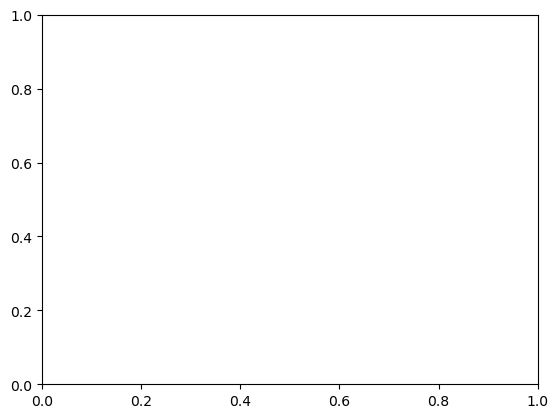

In [129]:
plt.pcolormesh(coords_2d(coord_x, coord_y, 4, M_x, M_y)[0], 
               coords_2d(coord_x, coord_y, 4, M_x, M_y)[1], 
               norm_Gaussian_2d(coords_2d(coord_x, coord_y, 4, M_x, M_y), array_2d(M_x, M_y, 4), 
               [1, 1], L_x, L_y, M_x, M_y))

In [143]:
x = coords_2d(coord_x, coord_y, 4, M_x, M_y)[0].reshape(21 * 16, 1)
y = coords_2d(coord_x, coord_y, 4, M_x, M_y)[1].reshape(21 * 16, 1)

In [144]:
z = norm_Gaussian_2d(coords_2d(coord_x, coord_y, 4, M_x, M_y), 
                     array_2d(M_x, M_y, 4), 
                     [1, 1], L_x, L_y, M_x, M_y).reshape(21 * 16, 1)

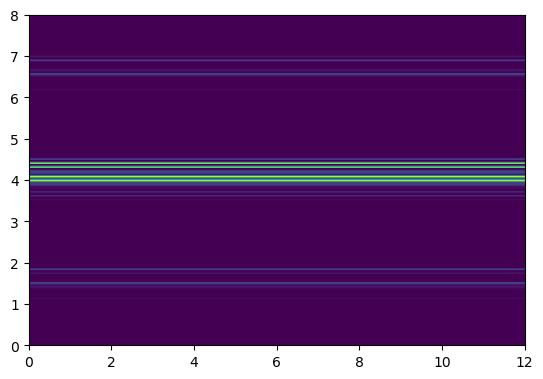

In [146]:
plt.imshow(z, extent=[x.min(), x.max(), y.min(), y.max()])

In [148]:
coords_2d(coord_x, coord_y, 4, M_x, M_y)[0].reshape(3 * 4, 7 * 4)

array([[ 0.        ,  0.2763932 ,  0.7236068 ,  1.        ,  0.        ,
         0.2763932 ,  0.7236068 ,  1.        ,  0.        ,  0.2763932 ,
         0.7236068 ,  1.        ,  0.        ,  0.2763932 ,  0.7236068 ,
         1.        ,  1.        ,  1.2763932 ,  1.7236068 ,  2.        ,
         1.        ,  1.2763932 ,  1.7236068 ,  2.        ,  1.        ,
         1.2763932 ,  1.7236068 ,  2.        ],
       [ 1.        ,  1.2763932 ,  1.7236068 ,  2.        ,  2.        ,
         3.10557281,  4.89442719,  6.        ,  2.        ,  3.10557281,
         4.89442719,  6.        ,  2.        ,  3.10557281,  4.89442719,
         6.        ,  2.        ,  3.10557281,  4.89442719,  6.        ,
         6.        ,  6.5527864 ,  7.4472136 ,  8.        ,  6.        ,
         6.5527864 ,  7.4472136 ,  8.        ],
       [ 6.        ,  6.5527864 ,  7.4472136 ,  8.        ,  6.        ,
         6.5527864 ,  7.4472136 ,  8.        ,  8.        ,  8.5527864 ,
         9.4472136 , 10.    